In [74]:
import pandas as pd
import numpy as np

### Load Dataset

In [75]:
df = pd.read_csv(r"Churn_Modelling.csv")

In [76]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [77]:
type(df)

pandas.core.frame.DataFrame

### Descriptive Statistics

In [78]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Finding the Missing Values

In [79]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [80]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.shape


(10000, 14)

In [15]:
df["Geography"]

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

### Handling the Missing values.

In [16]:
df["Geography"].mode()[0]

'France'

In [17]:
df["Gender"].mode()[0]

'Male'

In [18]:
df["Age"].mean()

38.9218

In [20]:
df["Geography"].fillna(df["Geography"].mode()[0],inplace = True)
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [21]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [22]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [23]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


### Spliting the data into dependent and independent variables.

In [25]:
x = df.iloc[:,3:13]
y = df.iloc[:,13:14]

In [26]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [27]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [28]:
x = x.values
y = y.values

In [29]:
x


array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [31]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [32]:
x.shape # 3 - 13

(10000, 10)

In [33]:
y.shape # 14

(10000, 1)

In [34]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

### Check for Categorical columns and perform encoding.

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
x[0:10,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [39]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder ="passthrough")
x=ct.fit_transform(x)

In [40]:
x[0:10,:]

array([[1.0, 0.0, 0.0, 1.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 1.0, 0.0, 608, 41, 1, 83807.86, 1, 0, 1,
        112542.58],
       [1.0, 0.0, 0.0, 1.0, 0.0, 502, 42, 8, 159660.8, 3, 1, 0,
        113931.57],
       [1.0, 0.0, 0.0, 1.0, 0.0, 699, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 1.0, 0.0, 850, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 0.0, 1.0, 645, 44, 8, 113755.78, 2, 1, 0,
        149756.71],
       [1.0, 0.0, 0.0, 0.0, 1.0, 822, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 1.0, 0.0, 376, 29, 4, 115046.74, 4, 1, 0,
        119346.88],
       [1.0, 0.0, 0.0, 0.0, 1.0, 501, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 0.0, 1.0, 684, 27, 2, 134603.88, 1, 1, 1,
        71725.73]], dtype=object)

### Split the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [42]:
x_train.shape

(8000, 13)

In [44]:
y_train.shape

(8000, 1)

In [45]:
x_test.shape

(2000, 13)

### Scale the independent variables

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
x_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [49]:
x_test

array([[-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121,  1.62185911],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.62356528]])

### Visulaization
### Univariate analysis

In [50]:
df1 = df.iloc[:,3:14]

In [51]:
exited_t=df1.loc[df1['Exited']==1]

In [52]:
exited_f=df1.loc[df1['Exited']==0]

In [53]:
exited_t.shape

(2037, 11)

In [54]:
exited_f.shape

(7963, 11)

In [62]:
import matplotlib.pyplot as plt

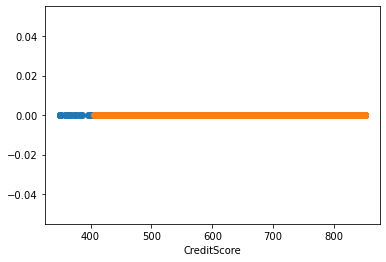

In [63]:
plt.plot(exited_t['CreditScore'],np.zeros_like(exited_t['CreditScore']),'o')
plt.plot(exited_f['CreditScore'],np.zeros_like(exited_f['CreditScore']),'o')
plt.xlabel('CreditScore')
plt.show()

In [66]:
import seaborn as sns

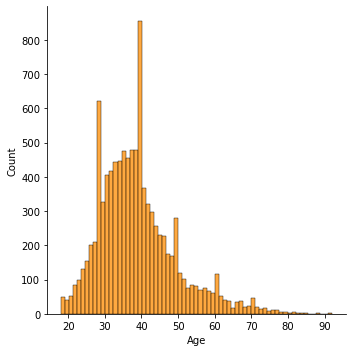

In [67]:
sns.displot(df["Age"], color='darkorange')

/tmp/ipykernel_4647/3705796227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],hist=False,color='blue')


<AxesSubplot:xlabel='Age', ylabel='Density'>

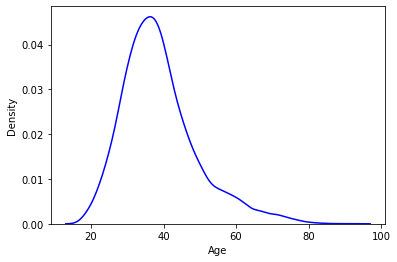

In [68]:
sns.distplot(df["Age"],hist=False,color='blue') 

### Bivariate Analysis

/home/aathikrish/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/aathikrish/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


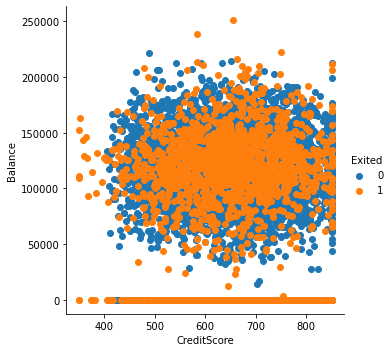

In [71]:
sns.FacetGrid(df1,hue='Exited',height=5).map(plt.scatter,'CreditScore','Balance').add_legend();
plt.show()

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

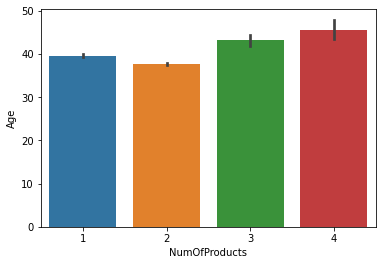

In [92]:
sns.barplot(x = "NumOfProducts",y = "Age", data = df)

<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

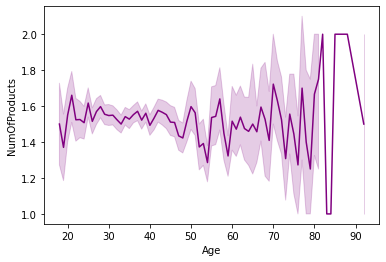

In [93]:
sns.lineplot(x = "Age",y = "NumOfProducts",data = df, color='purple')

In [91]:
import seaborn as sns

### Multivariate Analysis

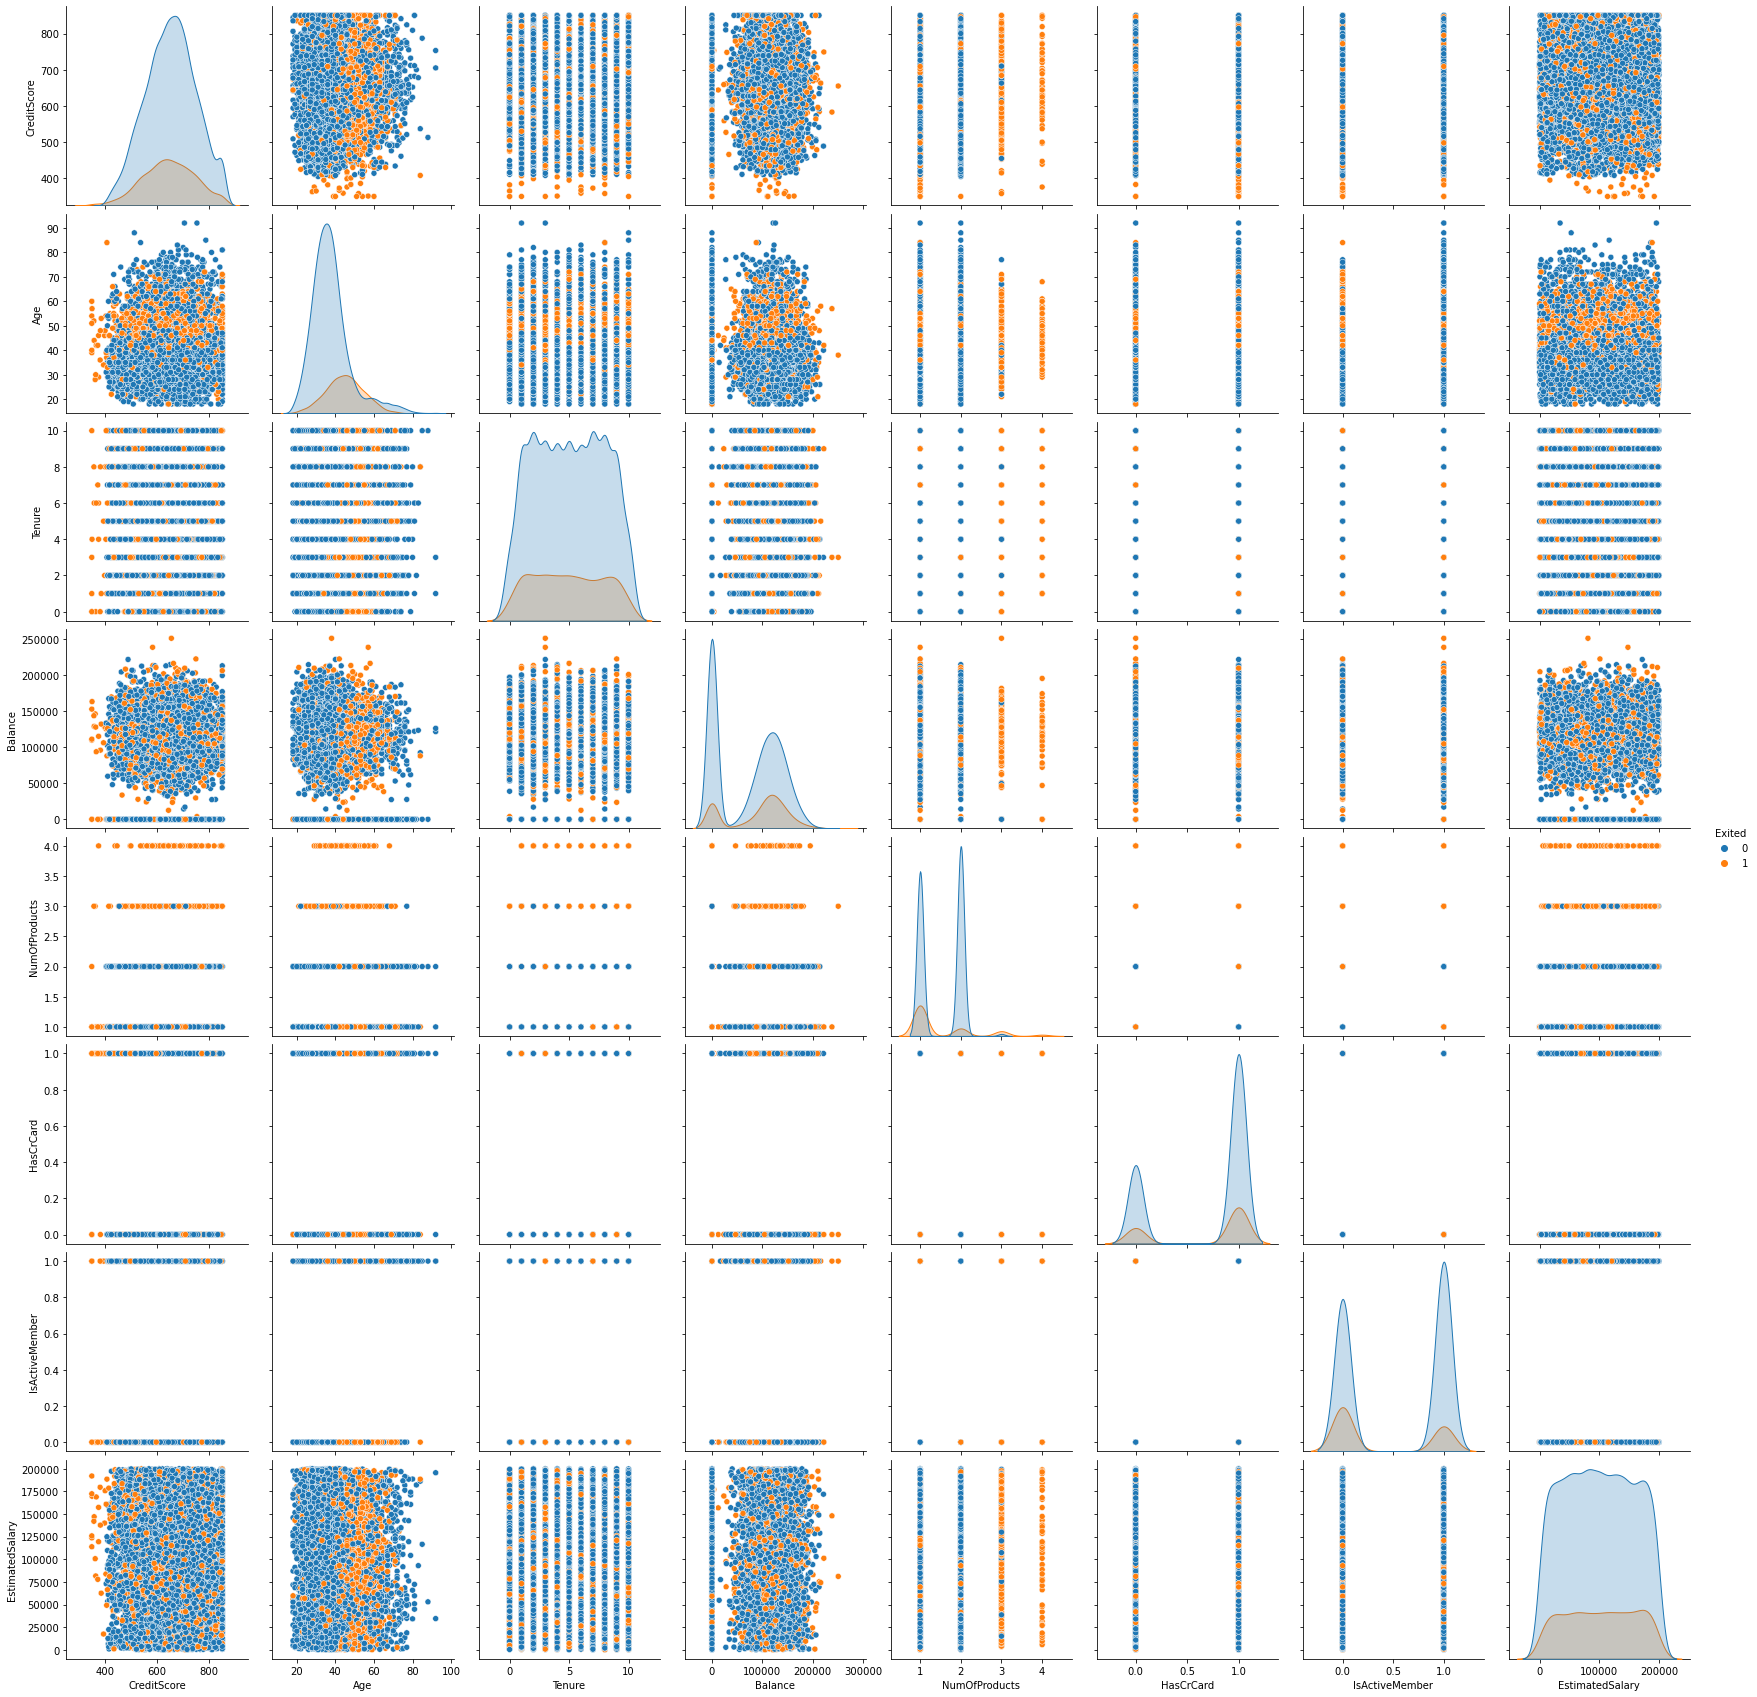

In [89]:
sns.pairplot(df1,hue='Exited',height=3)

### 

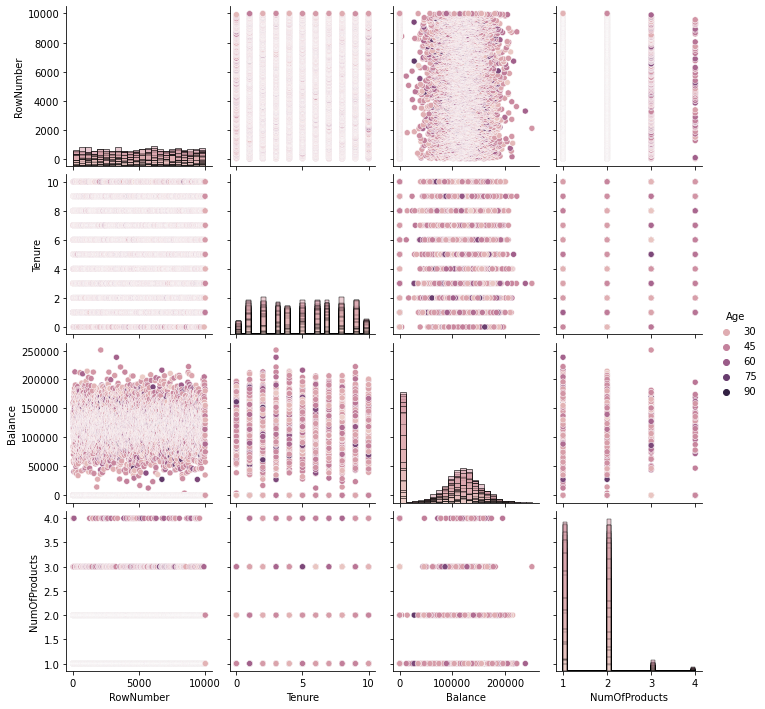

In [90]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]], hue="Age", diag_kind="hist")

## Outliers

In [96]:
import matplotlib.pyplot as plt

In [97]:
outlierss=df.quantile(q=(0.25,0.75))
outlierss

/tmp/ipykernel_4647/936682250.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outlierss=df.quantile(q=(0.25,0.75))


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [98]:
aaa=outlierss.loc[0.75]-outlierss.loc[0.25]
aaa

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [99]:
low = outlierss.loc[0.25] - 1.5*aaa
low

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [100]:
high = outlierss.loc[0.75] + 1.5 * aaa
high

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

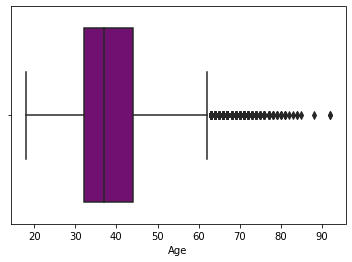

In [68]:
sns.boxplot(df["Age"],color='purple')

<AxesSubplot:>

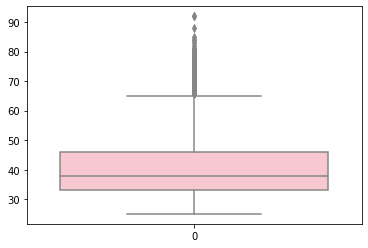

In [101]:
df["Age"]=np.where(df["Age"]<25,50,df["Age"])
sns.boxplot(df["Age"],color='pink')